# Email Spam Detection

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/spam mail.csv')
df.shape

(5572, 2)

In [3]:
df.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Masseges  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,Category,Masseges
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Data Preprocessing

In [8]:
# tf - idf vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode target 'Category' to numeric (use actual column name)
le = LabelEncoder()
y = le.fit_transform(df['Category'])  # 'ham'/'spam' -> 0/1

# TF-IDF vectorization on the message column (use actual column name)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # adjust max_features as needed
X = tfidf.fit_transform(df['Masseges'])  # returns sparse matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Handling Null values 
df.isnull().sum()

Category    0
Masseges    0
dtype: int64

In [13]:
# Handling duplicate values
df.duplicated().sum()

np.int64(403)

## Training Model

In [11]:
# Naive Bayes Algorithm
# Use existing preprocessing and variable names (from earlier cells):
# - df has columns 'Category' and 'Masseges'
# - tfidf, X_train, X_test, y_train, y_test, le already defined

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Train Multinomial Naive Bayes on already-prepared splits
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

print("Model Training Completed")

Model Training Completed


## Evaluation

Accuracy: 0.9748878923766816
ROC AUC: 0.9868601036269431
Confusion Matrix:
 [[965   0]
 [ 28 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



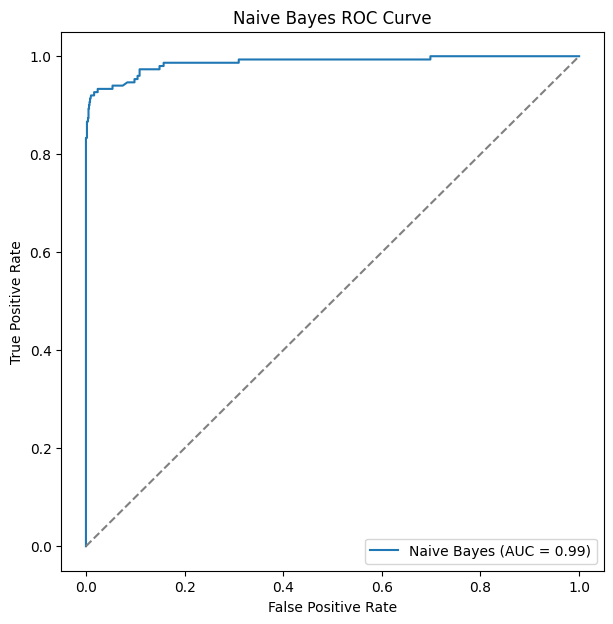

In [12]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_proba_nb):.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()
plt.show()


Thanks